# Problem 1

## Problem Description
In this problem you will create your own neural network to fit a function with two input features $x_0$ and $x_1$, and predict the output, $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an MSE for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model MSE
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [22]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import optim

def dataGen():
    # Set random seed so generated random numbers are always the same
    gen = np.random.RandomState(0)
    # Generate x0 and x1
    x = 2*(gen.rand(200,2)-0.5)
    # Generate y with x0^2 - 0.2*x1^4 + x0*x1 + noise
    y = x[:,0]**2 - 0.2*x[:,1]**4 + x[:,0]*x[:,1] + 0.4*(gen.rand(len(x))-0.5)
    
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 25
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]),max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]),max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = model(Xgrid).reshape(n,n)
    # 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot data
    ax.scatter(x[:,0],x[:,1],y, c = y, cmap = 'viridis')
    # Plot model
    ax.plot_surface(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(), color = 'gray', alpha = 0.25)
    ax.plot_wireframe(X0.detach().numpy(),X1.detach().numpy(),Ypred.detach().numpy(),color = 'black', alpha = 0.25)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 3D scatter plot.

Text(0.5, 0, 'y')

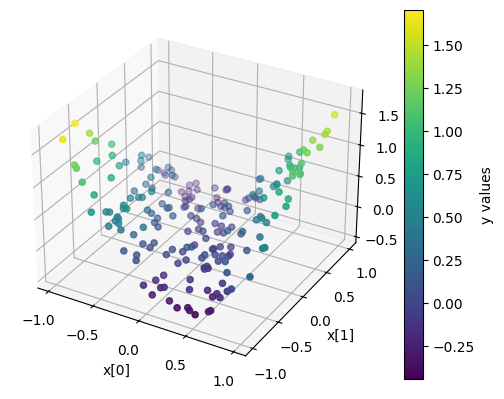

In [23]:
# YOUR CODE GOES HERE
[x, y] = dataGen()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(x[:, 0], x[:, 1], y, c = y, cmap = 'viridis')
plt.colorbar(sc, ax = ax, label='y values')
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")
ax.set_zlabel("y")

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An MSE smaller than 0.02 is reasonable. 

Model details: 
 neural_network(
  (linear_1): Linear(in_features=2, out_features=8, bias=True)
  (linear_2): Linear(in_features=8, out_features=8, bias=True)
  (linear_3): Linear(in_features=8, out_features=8, bias=True)
  (linear_4): Linear(in_features=8, out_features=8, bias=True)
  (linear_5): Linear(in_features=8, out_features=1, bias=True)
)
Iteration:  0 , Loss:  0.245836541056633
Iteration:  100 , Loss:  0.19771771132946014
Iteration:  200 , Loss:  0.028797900304198265
Iteration:  300 , Loss:  0.02437671832740307
Iteration:  400 , Loss:  0.023777756839990616
Iteration:  500 , Loss:  0.023349428549408913
Iteration:  600 , Loss:  0.022998562082648277
Iteration:  700 , Loss:  0.02271977812051773
Iteration:  800 , Loss:  0.022491293027997017
Iteration:  900 , Loss:  0.022352388128638268
Iteration:  1000 , Loss:  0.02219715155661106
Iteration:  1100 , Loss:  0.0216795913875103
Iteration:  1200 , Loss:  0.019483935087919235
Iteration:  1300 , Loss:  0.015042351558804512
Iteration:  1

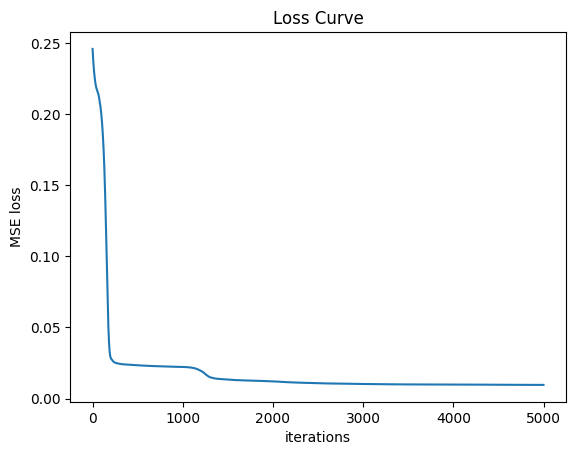

In [36]:
# YOUR CODE GOES HERE
lr = 0.001
epochs = 5000

class neural_network(nn.Module):
    def __init__(self, n_hidden = 6, n_in = 2, n_out = 1, activation = nn.functional.tanh):
        super().__init__()

        self.linear_1 = nn.Linear(n_in, n_hidden)
        self.linear_2 = nn.Linear(n_hidden, n_hidden)
        self.linear_3 = nn.Linear(n_hidden, n_hidden)
        self.linear_4 = nn.Linear(n_hidden, n_hidden)
        self.linear_5 = nn.Linear(n_hidden, n_out)

        self.activation = activation

    def forward(self, x):
        x = self.linear_1(x)
        x = self.activation(x)

        x = self.linear_2(x)
        x = self.activation(x)

        x = self.linear_3(x)
        x = self.activation(x)

        x = self.linear_4(x)
        x = self.activation(x)

        x = self.linear_5(x)

        return x
    
model = neural_network(n_hidden = 8, n_in = 2, n_out = 1, activation = nn.functional.relu)
x = torch.Tensor(x)
y = torch.Tensor(y).reshape(-1, 1)

loss_curve = []

print("Model details: \n", model)


loss_function = nn.functional.mse_loss

opt = optim.Adam(params = model.parameters(), lr = lr)

for i in range(epochs):
    output = model(x)
    loss = loss_function(output, y)

    loss_curve.append(loss.item())

    if(i % 100 == 0):
        print("Iteration: ", i, ", Loss: ", loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure()
plt.plot(loss_curve)
plt.xlabel("iterations")
plt.ylabel("MSE loss")
plt.title("Loss Curve")
plt.show()

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

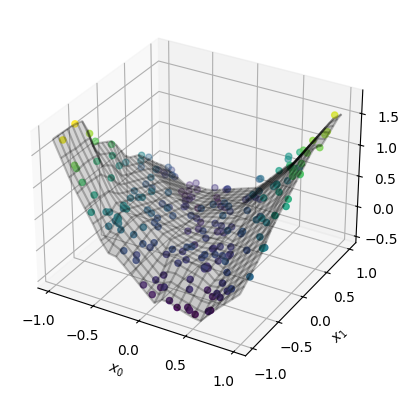

In [37]:
# YOUR CODE GOES HERE
visualizeModel(model)

## Discussion
Report the MSE of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

*YOUR ANSWER GOES HERE*


Final MSE value: 0.00958

*Structure of the network*
- Input layer: 2 neurons
- Hidden layer 1: 8 neurons
- Hidden layer 2: 8 neurons
- Hidden layer 3: 8 neurons
- Hidden layer 4: 8 neurons
- Output layer: 1 neuron
- Activation function: relu

The model has 5 layers, with the first 4 layers having 10 neurons each. Each layer has a relu activation function, and the last layer has 1 neurons, with no activation function.

- Optimizer: Adam
- Learning rate: 0.001
- Max epochs: 5000